# Proyecto 3: Analizador de imágenes
Citlali Melchor Ramírez 

03.30.19

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from random import randint, uniform,random
from scipy.ndimage import rotate
from scipy.misc import imread, imshow


In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

#### Mustra todas las etiquetas usadas sin repetición

In [3]:
a=unpickle("data_batch_1")
c=unpickle("batches.meta")
eti=c[b'label_names']
print(eti)


[b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']


#### Grafica la primer imagen del diccionario con su respectiva etiqueta


In [4]:
num=0
etiqueta=a[b'filenames'][num]
img1=a[b'data'][num]
#imagen1=img1.reshape(32,32,3,order='F')

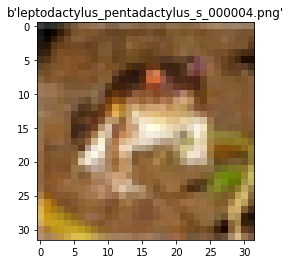

In [5]:
#rotate_img = rotate(imagen1, -90)
imgplot = plt.imshow(img1.reshape(3,32,32).transpose([1, 2, 0]))
plt.title(etiqueta)
plt.show()

#### Graficar 10 imágenes aleatorias con sus etiquetas

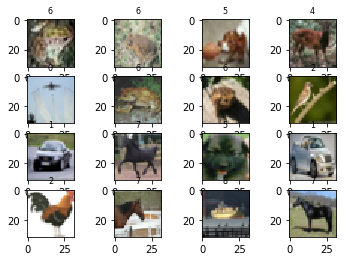

In [6]:
w=32
h=32
fig=plt.figure()
columns = 4
rows = 4
#aleat=randint(0,len(a[b'data']))
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    aleat=randint(0,len(a[b'data']))
    img=a[b'data'][aleat].reshape(3,32,32).transpose([1, 2, 0])
    #rotate_img = rotate(img, -90)
    imgplot = plt.imshow(img)
    etiqueta=a[b'filenames'][aleat]
    label=a[b'labels'][aleat]
    plt.title(label, fontsize=8)
    

#### Crea un clasificador CNN con Keras

In [7]:
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Activation, Dense, Dropout, BatchNormalization
from keras import optimizers, regularizers

Using TensorFlow backend.


In [20]:
X = []
Y=[]

for i in a[b'labels']:
    #cont=[0,0,0,0,0,0,0,0,0,0]
    #cont[i]=1
    #Y.append([cont])
    Y.append([i])
#Y=a[b'labels']

for im in a[b"data"]:
    mat = im.reshape(3,32,32).transpose([1, 2, 0])
    X.append(mat)   
#X=a[b'data']

In [21]:
X = np.array(X)
Y = np.array(Y)

In [23]:
Y

array([[6],
       [9],
       [9],
       ...,
       [1],
       [1],
       [5]])

In [24]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(32, 32,3)))
#model.fit(X, Y) # Y = labels (batch_1[b"labels"])

model.add(Activation("relu"))

#model.add(Conv2D(32, (3, 3)))
#model.add(Activation("relu"))

# Capas Pooling (El reductor)
model.add(MaxPooling2D(pool_size=(2, 2),data_format="channels_first"))

# Capa Dropout (La pérdida)
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))

#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2),data_format="channels_first"))

model.add(Dropout(0.25))

# Capa Flatten (El aplanador)
model.add(Flatten())

# Capas de Clasificación (El aprendizaje)
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [25]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 16, 32)        4640      
_________________________________________________________________
activation_4 (Activation)    (None, 32, 16, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 8, 16)         0         
__________

In [26]:
model.fit(X, Y,batch_size=100,epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
10000/10000 [==============================] - 81s 8ms/step - loss: 14.4471 - acc: 0.1032
Epoch 2/20
10000/10000 [==============================] - 73s 7ms/step - loss: 14.4547 - acc: 0.1032
Epoch 3/20
10000/10000 [==============================] - 64s 6ms/step - loss: 14.4547 - acc: 0.1032
Epoch 4/20
10000/10000 [==============================] - 60s 6ms/step - loss: 14.4547 - acc: 0.1032
Epoch 5/20
10000/10000 [==============================] - 58s 6ms/step - loss: 14.4547 - acc: 0.1032
Epoch 6/20
10000/10000 [==============================] - 55s 5ms/step - loss: 14.4547 - acc: 0.1032
Epoch 7/20
10000/10000 [==============================] - 57s 6ms/step - loss: 14.4547 - acc: 0.1032
Epoch 8/20
10000/10000 [==============================] - 57s 6ms/step - loss: 14.4547 - acc: 0.1032
Epoch 9/20
10000/10000 [==============================] - 58s 6ms/step - loss: 14.4547 - acc: 0.1032
Epoch 10/20
10000/10000 [==================

In [28]:
a[b'data'][0].size

3072

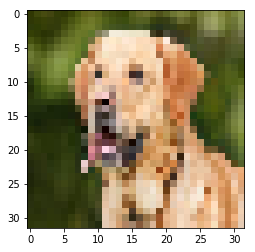

In [29]:
from PIL import Image
import numpy as np

im = Image.open("dog.jpg").resize((32, 32)).convert('RGB')
plt.imshow(im)
#x_test=np.array(im).reshape(3,32,32)
#print(x_test.shape)

im_array = np.array(im).reshape(3,32,32).transpose([1, 2, 0])

x_test = np.array([im_array]) # np.array([im1, im2, im3, ...])

#print(x_test)

In [30]:
c[b'label_names']

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

In [31]:
predict=model.predict(x_test)
print(predict)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
